* 데이터 수집      
https://data.seoul.go.kr/dataList/5/literacyView.do

In [1]:
import pandas as pd

In [2]:
# 그래프를 노트북 안에 그리기 위해 설정
%matplotlib inline

# 필요한 패키지와 라이브러리 가져온다.
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

# 폰트 지정하기
plt.rcParams['font.family'] = 'gulim'

# 데이터 확인 및 전처리

## 2021년 공공자전거 대여이력 정보

### 데이터프레임 생성/확인

In [5]:
df1 = pd.read_csv('C:/workspace/Test_Data/공공자전거 대여이력 정보_2021.01.csv', encoding='cp949', low_memory=False)
df2 = pd.read_csv('C:/workspace/Test_Data/공공자전거 대여이력 정보_2021.02.csv', encoding='cp949', low_memory=False)
df3 = pd.read_csv('C:/workspace/Test_Data/공공자전거 대여이력 정보_2021.03.csv', encoding='cp949', low_memory=False)
df4 = pd.read_csv('C:/workspace/Test_Data/공공자전거 대여이력 정보_2021.04.csv', encoding='cp949', low_memory=False)
df5 = pd.read_csv('C:/workspace/Test_Data/공공자전거 대여이력 정보_2021.05.csv', encoding='cp949', low_memory=False)
df6 = pd.read_csv('C:/workspace/Test_Data/공공자전거 대여이력 정보_2021.06.csv', encoding='cp949', low_memory=False)

In [6]:
df6.head(2)

,자전거번호,대여일시,대여 대여소번호,대여 대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리
0,SPB-30385,2021-05-31 23:07:00,3571,화양 APT(횡단보도 옆),0,2021-06-01 00:00:00,03538,서울숲 IT캐슬,0,53.0,2502.8
1,SPB-46321,2021-05-31 23:37:19,1911,구로디지털단지역 앞,0,2021-06-01 00:00:02,01843,독산고등학교,0,22.0,1630.0


### 데이터 연결/확인
* concat

In [7]:
# concat
df = pd.concat([df1,df2,df3,df4,df5,df6])

In [8]:
# head
df.head(5)

,자전거번호,대여일시,대여 대여소번호,대여 대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리
0,SPB-53145,2021-01-02 20:50:36,3,중랑센터,0,2021-01-02 21:15:41,668,서울축산농협(장안지점),0,25.0,0.00
1,SPB-53074,2021-01-04 16:02:12,3,중랑센터,0,2021-01-04 16:17:06,668,서울축산농협(장안지점),0,14.0,0.00
2,SPB-50952,2021-01-13 21:02:05,3,중랑센터,0,2021-01-13 21:14:04,668,서울축산농협(장안지점),0,11.0,1853.99
3,SPB-52380,2021-01-14 21:02:55,3,중랑센터,0,2021-01-14 21:13:41,668,서울축산농협(장안지점),0,10.0,0.00
4,SPB-52380,2021-01-18 18:02:08,3,중랑센터,0,2021-01-18 18:15:22,540,군자역 7번출구 베스트샵 앞,0,13.0,2291.05


In [9]:
#tail
df.tail(2)

,자전거번호,대여일시,대여 대여소번호,대여 대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리
3445942,SPB-41691,2021-06-30 22:11:14,2220,반포본동 주민센터 앞,0,2021-07-01 04:55:29,02526,반포경남쇼핑 앞,0,404.0,0.00
3445943,SPB-52274,2021-06-30 22:12:10,2220,반포본동 주민센터 앞,0,2021-07-01 04:55:30,02526,반포경남쇼핑 앞,0,403.0,4541.22


In [13]:
# 데이터 크기    size는 전체 셀 갯수
df.shape

(13613873, 11)

In [14]:
# 데이터 정보(사용메모리)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13613873 entries, 0 to 3445943
Data columns (total 11 columns):
 #   Column    Dtype  
---  ------    -----  
 0   자전거번호     object 
 1   대여일시      object 
 2   대여 대여소번호  int64  
 3   대여 대여소명   object 
 4   대여거치대     object 
 5   반납일시      object 
 6   반납대여소번호   object 
 7   반납대여소명    object 
 8   반납거치대     int64  
 9   이용시간      float64
 10  이용거리      float64
dtypes: float64(2), int64(2), object(7)
memory usage: 1.2+ GB


## 데이터 전처리

### 불필요한 컬럼 제거

In [15]:
# 자전거번호, 대여거치대, 반납거치대 제거
df.drop(['자전거번호','대여거치대','반납거치대'] ,inplace = True, axis =1)
df

,대여일시,대여 대여소번호,대여 대여소명,반납일시,반납대여소번호,반납대여소명,이용시간,이용거리
0,2021-01-02 20:50:36,3,중랑센터,2021-01-02 21:15:41,668,서울축산농협(장안지점),25.0,0.00
1,2021-01-04 16:02:12,3,중랑센터,2021-01-04 16:17:06,668,서울축산농협(장안지점),14.0,0.00
2,2021-01-13 21:02:05,3,중랑센터,2021-01-13 21:14:04,668,서울축산농협(장안지점),11.0,1853.99
3,2021-01-14 21:02:55,3,중랑센터,2021-01-14 21:13:41,668,서울축산농협(장안지점),10.0,0.00
4,2021-01-18 18:02:08,3,중랑센터,2021-01-18 18:15:22,540,군자역 7번출구 베스트샵 앞,13.0,2291.05
...,...,...,...,...,...,...,...,...
3445939,2021-06-30 22:44:14,152,마포구민체육센터 앞,2021-07-01 04:48:33,00126,서강대 후문 옆,364.0,10153.36
3445940,2021-06-30 22:45:19,152,마포구민체육센터 앞,2021-07-01 04:52:25,00437,대흥역 1번출구,367.0,10100.71
3445941,2021-06-30 22:43:43,152,마포구민체육센터 앞,2021-07-01 04:52:27,00437,대흥역 1번출구,368.0,430.00
3445942,2021-06-30 22:11:14,2220,반포본동 주민센터 앞,2021-07-01 04:55:29,02526,반포경남쇼핑 앞,404.0,0.00


### 자료형 확인/변경

In [17]:
# 자료형 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13613873 entries, 0 to 3445943
Data columns (total 8 columns):
 #   Column    Dtype  
---  ------    -----  
 0   대여일시      object 
 1   대여 대여소번호  int64  
 2   대여 대여소명   object 
 3   반납일시      object 
 4   반납대여소번호   object 
 5   반납대여소명    object 
 6   이용시간      float64
 7   이용거리      float64
dtypes: float64(2), int64(1), object(5)
memory usage: 934.8+ MB


In [21]:
# 카테고리형으로 변경  :    대여 대여소번호, 반납대여소번호
df['대여 대여소번호'] = df['대여 대여소번호'].astype('category')
df['반납대여소번호'] = df['반납대여소번호'].astype('category')

In [20]:
# 메모리 용량 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13613873 entries, 0 to 3445943
Data columns (total 8 columns):
 #   Column    Dtype   
---  ------    -----   
 0   대여일시      object  
 1   대여 대여소번호  category
 2   대여 대여소명   object  
 3   반납일시      object  
 4   반납대여소번호   category
 5   반납대여소명    object  
 6   이용시간      float64 
 7   이용거리      float64 
dtypes: category(2), float64(2), object(4)
memory usage: 779.2+ MB


In [33]:
# datetime형으로 변경 : 대여일시,반납일시
# errors 오류 = 1. 무시, 2. 상승, 3.강제 default가 상승
# raise인 경우 잘못된 구문 분석을 예외를 발생시킨다.
# coerce 잘못된 구문 분석이 NaT 값으로 설정
# ignore 무시
df['대여일시'] = pd.to_datetime(df['대여일시'], errors ='coerce')
df['반납일시'] = pd.to_datetime(df['반납일시'], errors ='coerce')

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13613873 entries, 0 to 3445943
Data columns (total 8 columns):
 #   Column    Dtype         
---  ------    -----         
 0   대여일시      datetime64[ns]
 1   대여 대여소번호  category      
 2   대여 대여소명   object        
 3   반납일시      datetime64[ns]
 4   반납대여소번호   category      
 5   반납대여소명    object        
 6   이용시간      float64       
 7   이용거리      float64       
dtypes: category(2), datetime64[ns](2), float64(2), object(2)
memory usage: 779.2+ MB


In [ ]:
# 자료형 변경 확인

## 결측치 확인/처리

In [35]:
# 결측치 확인
df.isnull().sum()

대여일시          0
대여 대여소번호      0
대여 대여소명       0
반납일시        146
반납대여소번호       0
반납대여소명        0
이용시간          0
이용거리        269
dtype: int64

In [36]:
# 결측치 제거
df = df.dropna() # df.dropna(inplace = True)

In [37]:
# 결측치 확인
df.isnull().sum()

대여일시        0
대여 대여소번호    0
대여 대여소명     0
반납일시        0
반납대여소번호     0
반납대여소명      0
이용시간        0
이용거리        0
dtype: int64

# 일별 이용 현황

## 대여날짜 컬럼 추가
* date

In [38]:
df['대여날짜'] = df['대여일시'].dt.date

C:\Users\tjoeun\AppData\Local\Temp\ipykernel_2768\3174417985.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['대여날짜'] = df['대여일시'].dt.date


In [39]:
df.head()

,대여일시,대여 대여소번호,대여 대여소명,반납일시,반납대여소번호,반납대여소명,이용시간,이용거리,대여날짜
0,2021-01-02 20:50:36,3,중랑센터,2021-01-02 21:15:41,668,서울축산농협(장안지점),25.0,0.00,2021-01-02
1,2021-01-04 16:02:12,3,중랑센터,2021-01-04 16:17:06,668,서울축산농협(장안지점),14.0,0.00,2021-01-04
2,2021-01-13 21:02:05,3,중랑센터,2021-01-13 21:14:04,668,서울축산농협(장안지점),11.0,1853.99,2021-01-13
3,2021-01-14 21:02:55,3,중랑센터,2021-01-14 21:13:41,668,서울축산농협(장안지점),10.0,0.00,2021-01-14
4,2021-01-18 18:02:08,3,중랑센터,2021-01-18 18:15:22,540,군자역 7번출구 베스트샵 앞,13.0,2291.05,2021-01-18


## 대여날짜 별 대여 건수
* groupby
* to_frame

In [42]:
# 대여날짜 별 대여건수 추출
df_count = df.groupby('대여날짜').대여일시.count().to_frame()
df_count

,대여일시
대여날짜,
2021-01-01,22119
2021-01-02,23463
2021-01-03,21656
2021-01-04,32732
2021-01-05,28819
...,...
2021-06-26,105414
2021-06-27,92486
2021-06-28,105882


In [ ]:
# 대여날짜 별 대여건수 시각화

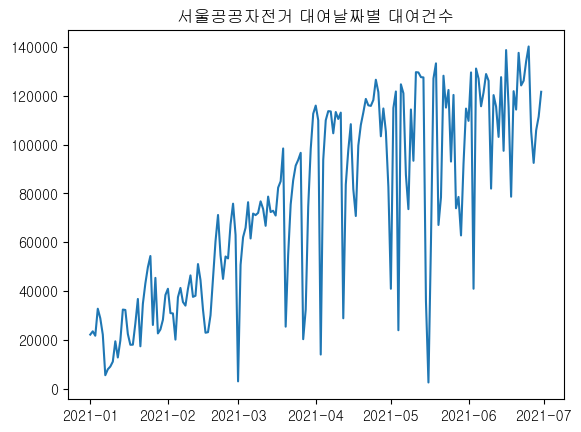

In [44]:
plt.plot(df_count.index, df_count.values)
plt.title('서울공공자전거 대여날짜별 대여건수')
plt.show()

## 대여날짜 별 이용시간
* groupby
* to_frame

In [51]:
# 대여날짜 별 이용시간 추출
df.time = df.groupby('대여날짜')['이용시간'].sum().to_frame()
df.time


,이용시간
대여날짜,
2021-01-01,692309.0
2021-01-02,686580.0
2021-01-03,609571.0
2021-01-04,750721.0
2021-01-05,610227.0
...,...
2021-06-26,3168288.0
2021-06-27,2706168.0
2021-06-28,2405249.0


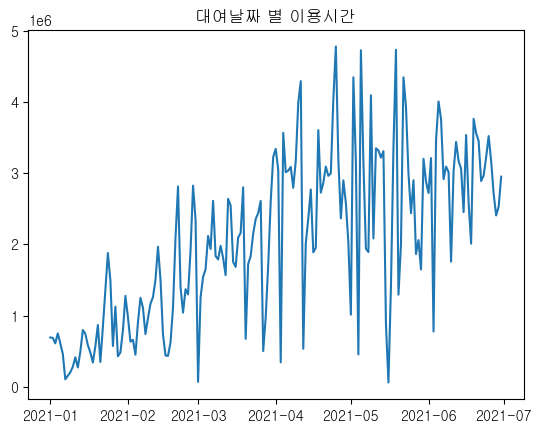

In [52]:
# 대여날짜 별 이용시간 시각화
plt.plot(df.time.index, df.time.values)
plt.title('대여날짜 별 이용시간')
plt.show()

## 대여날짜 별 이용 거리

In [53]:
# 대여날짜 별 이용거리 추출
df_dis = df.groupby('대여날짜').이용거리.sum().to_frame()
df_dis

,이용거리
대여날짜,
2021-01-01,4.613529e+07
2021-01-02,4.409618e+07
2021-01-03,4.059830e+07
2021-01-04,5.249645e+07
2021-01-05,6.944856e+07
...,...
2021-06-26,3.635015e+08
2021-06-27,3.078146e+08
2021-06-28,2.828124e+08


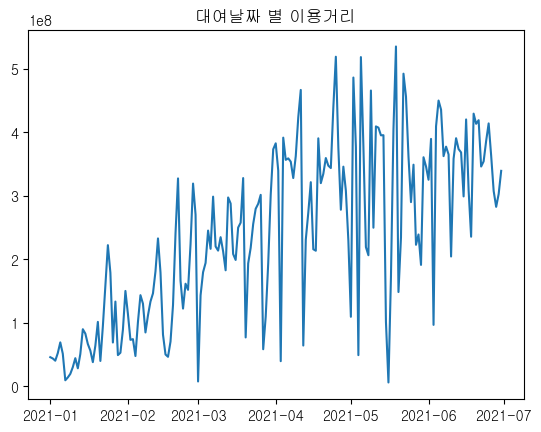

In [54]:
# 대여날짜 별 이용거리 시각화
plt.plot(df_dis.index, df_dis.values)
plt.title('대여날짜 별 이용거리')
plt.show()

## 데이터프레임 합치기

In [56]:
df_date = pd.concat([df_count, df_dis, df.time], axis= 1)
df_date

,대여일시,이용거리,이용시간
대여날짜,,,
2021-01-01,22119,4.613529e+07,692309.0
2021-01-02,23463,4.409618e+07,686580.0
2021-01-03,21656,4.059830e+07,609571.0
2021-01-04,32732,5.249645e+07,750721.0
2021-01-05,28819,6.944856e+07,610227.0
...,...,...,...
2021-06-26,105414,3.635015e+08,3168288.0
2021-06-27,92486,3.078146e+08,2706168.0
2021-06-28,105882,2.828124e+08,2405249.0


# 시간대별 대여/반납 현황

## 대여시간, 반납시간 컬럼 추가

In [57]:
df.head(5)

,대여일시,대여 대여소번호,대여 대여소명,반납일시,반납대여소번호,반납대여소명,이용시간,이용거리,대여날짜
0,2021-01-02 20:50:36,3,중랑센터,2021-01-02 21:15:41,668,서울축산농협(장안지점),25.0,0.00,2021-01-02
1,2021-01-04 16:02:12,3,중랑센터,2021-01-04 16:17:06,668,서울축산농협(장안지점),14.0,0.00,2021-01-04
2,2021-01-13 21:02:05,3,중랑센터,2021-01-13 21:14:04,668,서울축산농협(장안지점),11.0,1853.99,2021-01-13
3,2021-01-14 21:02:55,3,중랑센터,2021-01-14 21:13:41,668,서울축산농협(장안지점),10.0,0.00,2021-01-14
4,2021-01-18 18:02:08,3,중랑센터,2021-01-18 18:15:22,540,군자역 7번출구 베스트샵 앞,13.0,2291.05,2021-01-18


In [58]:
df['대여시간'] = df['대여일시'].dt.hour
df['반납시간'] = df['반납일시'].dt.hour

C:\Users\tjoeun\AppData\Local\Temp\ipykernel_2768\2052106026.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['대여시간'] = df['대여일시'].dt.hour
C:\Users\tjoeun\AppData\Local\Temp\ipykernel_2768\2052106026.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['반납시간'] = df['반납일시'].dt.hour


In [60]:
df.dtypes

대여일시        datetime64[ns]
대여 대여소번호          category
대여 대여소명             object
반납일시        datetime64[ns]
반납대여소번호           category
반납대여소명              object
이용시간               float64
이용거리               float64
대여날짜                object
대여시간                 int32
반납시간                 int32
dtype: object

In [61]:
df.head(5)

,대여일시,대여 대여소번호,대여 대여소명,반납일시,반납대여소번호,반납대여소명,이용시간,이용거리,대여날짜,대여시간,반납시간
0,2021-01-02 20:50:36,3,중랑센터,2021-01-02 21:15:41,668,서울축산농협(장안지점),25.0,0.00,2021-01-02,20,21
1,2021-01-04 16:02:12,3,중랑센터,2021-01-04 16:17:06,668,서울축산농협(장안지점),14.0,0.00,2021-01-04,16,16
2,2021-01-13 21:02:05,3,중랑센터,2021-01-13 21:14:04,668,서울축산농협(장안지점),11.0,1853.99,2021-01-13,21,21
3,2021-01-14 21:02:55,3,중랑센터,2021-01-14 21:13:41,668,서울축산농협(장안지점),10.0,0.00,2021-01-14,21,21
4,2021-01-18 18:02:08,3,중랑센터,2021-01-18 18:15:22,540,군자역 7번출구 베스트샵 앞,13.0,2291.05,2021-01-18,18,18


## 시간대별 대여/반납 현황

In [64]:
# 시간대별 대여현황
s_rental = df['대여시간'].value_counts()
s_rental

대여시간
18    1432779
17    1178279
19     984476
16     934211
20     825031
15     816040
8      808506
21     770378
14     725175
13     667237
22     643611
12     623065
11     537810
9      499995
7      486775
10     438084
23     341859
0      240025
6      188920
1      158905
2      103629
5       84713
3       68710
4       55391
Name: count, dtype: int64

In [66]:
# 시간대별 반납현황
s_return = df['반납시간'].value_counts()
s_return

반납시간
18    1437723
19    1125447
17    1097623
16     880629
20     864644
8      817076
21     812357
22     768302
15     749940
14     657826
13     628908
12     591577
9      499033
11     470053
23     447477
10     402350
7      389007
0      290169
1      190954
6      152003
2      125912
3       80243
5       73983
4       60368
Name: count, dtype: int64

## 시각화

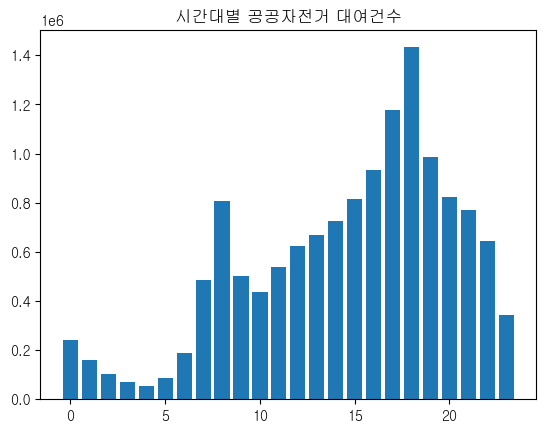

In [72]:
# 시간대별 공공자전거 대여건수 시각화
s_rental = s_rental.sort_index()
x = s_rental.index
y = s_rental.values
plt.bar(x,y)
plt.title('시간대별 공공자전거 대여건수')
plt.show()

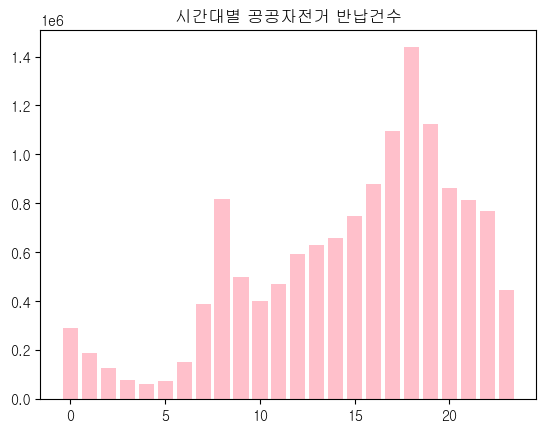

In [76]:
# 시간대별 공공자전거 반납건수 시각화
# s_return = s_return.sort_index()
# x = s_return.index
# y = s_return.values
plt.bar((s_return.sort_index()).index, s_return.values , color = 'pink')
plt.title('시간대별 공공자전거 반납건수')
plt.show()

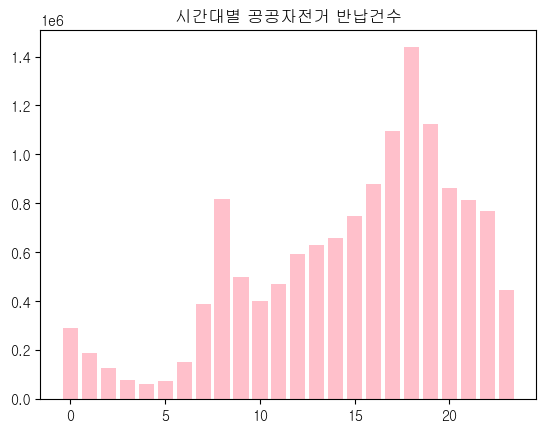

In [77]:
s_return = s_return.sort_index()
x = s_return.index
y = s_return.values
plt.bar(x,y, color = 'pink')
plt.title('시간대별 공공자전거 반납건수')
plt.show()

# 대여소별 대여/반납 현황

## 대여소 현황

In [81]:
# 대여 대여소번호 갯수
df['대여 대여소번호']

0             3
1             3
2             3
3             3
4             3
           ... 
3445939     152
3445940     152
3445941     152
3445942    2220
3445943    2220
Name: 대여 대여소번호, Length: 13613604, dtype: category
Categories (2493, int64): [3, 5, 10, 101, ..., 9999, 88888, 99997, 99999]

In [82]:
# 반납대여소번호 갯수
df.반납대여소번호

0            668
1            668
2            668
3            668
4            540
           ...  
3445939    00126
3445940    00437
3445941    00437
3445942    02526
3445943    02526
Name: 반납대여소번호, Length: 13613604, dtype: category
Categories (4811, object): [3, 10, 101, 102, ..., '화랑대역 2번출구 앞', '휘경sk뷰아파트 앞', '휘경여중고삼거리', '흑석역 4번출구']

In [93]:
# 반납대여소 번호 처리 (str형으로 변환)
df.반납대여소번호 = df.반납대여소번호.astype('str')
df.tail(2)

C:\Users\tjoeun\AppData\Local\Temp\ipykernel_2768\3950040227.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.반납대여소번호 = df.반납대여소번호.astype('str')


,대여일시,대여 대여소번호,대여 대여소명,반납일시,반납대여소번호,반납대여소명,이용시간,이용거리,대여날짜,대여시간,반납시간
3445942,2021-06-30 22:11:14,2220,반포본동 주민센터 앞,2021-07-01 04:55:29,02526,반포경남쇼핑 앞,404.0,0.00,2021-06-30,22,4
3445943,2021-06-30 22:12:10,2220,반포본동 주민센터 앞,2021-07-01 04:55:30,02526,반포경남쇼핑 앞,403.0,4541.22,2021-06-30,22,4


In [94]:
# 반납대여소 번호 처리 (왼쪽의 '0' 제거)
df.반납대여소번호 = df.반납대여소번호.str.lstrip('0')
df.tail(2)

C:\Users\tjoeun\AppData\Local\Temp\ipykernel_2768\3058364397.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.반납대여소번호 = df.반납대여소번호.str.lstrip('0')


,대여일시,대여 대여소번호,대여 대여소명,반납일시,반납대여소번호,반납대여소명,이용시간,이용거리,대여날짜,대여시간,반납시간
3445942,2021-06-30 22:11:14,2220,반포본동 주민센터 앞,2021-07-01 04:55:29,2526,반포경남쇼핑 앞,404.0,0.00,2021-06-30,22,4
3445943,2021-06-30 22:12:10,2220,반포본동 주민센터 앞,2021-07-01 04:55:30,2526,반포경남쇼핑 앞,403.0,4541.22,2021-06-30,22,4


In [97]:
# 반납대여소 번호 처리 (int형으로 변환)
df.반납대여소번호 = df.반납대여소번호.astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13613604 entries, 0 to 3445943
Data columns (total 11 columns):
 #   Column    Dtype         
---  ------    -----         
 0   대여일시      datetime64[ns]
 1   대여 대여소번호  category      
 2   대여 대여소명   object        
 3   반납일시      datetime64[ns]
 4   반납대여소번호   int32         
 5   반납대여소명    object        
 6   이용시간      float64       
 7   이용거리      float64       
 8   대여날짜      object        
 9   대여시간      int32         
 10  반납시간      int32         
dtypes: category(1), datetime64[ns](2), float64(2), int32(3), object(3)
memory usage: 1012.8+ MB


C:\Users\tjoeun\AppData\Local\Temp\ipykernel_2768\3233006601.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.반납대여소번호 = df.반납대여소번호.astype('int')


In [98]:
# 반납대여소 번호 처리 (category형으로 변환)
df.반납대여소번호 = df.반납대여소번호.astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13613604 entries, 0 to 3445943
Data columns (total 11 columns):
 #   Column    Dtype         
---  ------    -----         
 0   대여일시      datetime64[ns]
 1   대여 대여소번호  category      
 2   대여 대여소명   object        
 3   반납일시      datetime64[ns]
 4   반납대여소번호   category      
 5   반납대여소명    object        
 6   이용시간      float64       
 7   이용거리      float64       
 8   대여날짜      object        
 9   대여시간      int32         
 10  반납시간      int32         
dtypes: category(2), datetime64[ns](2), float64(2), int32(2), object(3)
memory usage: 986.8+ MB


C:\Users\tjoeun\AppData\Local\Temp\ipykernel_2768\1127167914.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.반납대여소번호 = df.반납대여소번호.astype('category')


## 대여건수가 가장 많은 대여소 best10

In [113]:
# value_counts
df[['대여 대여소명','대여 대여소번호']].value_counts()[:10].to_frame()


,,count
대여 대여소명,대여 대여소번호,
여의나루역 1번출구 앞,207,68994
뚝섬유원지역 1번출구 앞,502,68588
마포구민체육센터 앞,152,43535
봉림교 교통섬,2102,43368
롯데월드타워(잠실역2번출구 쪽),1210,37149
마곡나루역 2번 출구,2715,36988
신대방역 2번 출구,2177,31971
당산육갑문,272,31527
IFC몰,210,31443


## 반납건수가 가장 많은 대여소 best10

In [115]:
# value_counts
df[['반납대여소명','반납대여소번호']].value_counts()[:10].to_frame()

,,count
반납대여소명,반납대여소번호,
뚝섬유원지역 1번출구 앞,502,78958
여의나루역 1번출구 앞,207,68966
마포구민체육센터 앞,152,50607
봉림교 교통섬,2102,44572
롯데월드타워(잠실역2번출구 쪽),1210,37344
마곡나루역 2번 출구,2715,36876
당산육갑문,272,34276
IFC몰,210,33758
신대방역 2번 출구,2177,33159


## 여의나루역 1번출구 앞 대여소 이용현황

### 서브셋 만들기

In [116]:
df_207 = df[df['대여 대여소번호'] == 207]
df_207.head()

,대여일시,대여 대여소번호,대여 대여소명,반납일시,반납대여소번호,반납대여소명,이용시간,이용거리,대여날짜,대여시간,반납시간
45838,2021-01-01 01:05:49,207,여의나루역 1번출구 앞,2021-01-01 01:16:29,201,진미파라곤 앞,10.0,0.00,2021-01-01,1,1
45839,2021-01-01 04:28:45,207,여의나루역 1번출구 앞,2021-01-01 04:48:23,493,홍대입구역 6번출구,19.0,0.00,2021-01-01,4,4
45840,2021-01-01 09:39:23,207,여의나루역 1번출구 앞,2021-01-01 09:45:33,223,진주아파트상가 앞,6.0,877.23,2021-01-01,9,9
45841,2021-01-01 10:50:10,207,여의나루역 1번출구 앞,2021-01-01 11:17:49,207,여의나루역 1번출구 앞,27.0,0.00,2021-01-01,10,11
45842,2021-01-01 11:01:44,207,여의나루역 1번출구 앞,2021-01-01 11:19:02,207,여의나루역 1번출구 앞,17.0,0.00,2021-01-01,11,11


### 반납 현황

In [117]:
# value_counts
df_207[['반납대여소명','반납대여소번호']].value_counts()[:10].to_frame()

,,count
반납대여소명,반납대여소번호,
여의나루역 1번출구 앞,207,18347
국민일보 앞,202,2006
시범아파트버스정류장 옆,222,1588
여의도중학교 옆,249,1525
당산육갑문,272,1269
여의도초교 앞,221,1209
IFC몰,210,1063
여의도고교 앞,215,986
NH농협은행 앞,217,979


### 요일별 대여현황

In [122]:
#요일컬럼 추가 : strftime('%a')
df_207['대여요일'] = df_207['대여일시'].dt.strftime('%a')
df_207.head()

C:\Users\tjoeun\AppData\Local\Temp\ipykernel_2768\2818389243.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_207['대여요일'] = df_207['대여일시'].dt.strftime('%a')


,대여일시,대여 대여소번호,대여 대여소명,반납일시,반납대여소번호,반납대여소명,이용시간,이용거리,대여날짜,대여시간,반납시간,대여요일
45838,2021-01-01 01:05:49,207,여의나루역 1번출구 앞,2021-01-01 01:16:29,201,진미파라곤 앞,10.0,0.00,2021-01-01,1,1,Fri
45839,2021-01-01 04:28:45,207,여의나루역 1번출구 앞,2021-01-01 04:48:23,493,홍대입구역 6번출구,19.0,0.00,2021-01-01,4,4,Fri
45840,2021-01-01 09:39:23,207,여의나루역 1번출구 앞,2021-01-01 09:45:33,223,진주아파트상가 앞,6.0,877.23,2021-01-01,9,9,Fri
45841,2021-01-01 10:50:10,207,여의나루역 1번출구 앞,2021-01-01 11:17:49,207,여의나루역 1번출구 앞,27.0,0.00,2021-01-01,10,11,Fri
45842,2021-01-01 11:01:44,207,여의나루역 1번출구 앞,2021-01-01 11:19:02,207,여의나루역 1번출구 앞,17.0,0.00,2021-01-01,11,11,Fri


In [126]:
# value_counts
df_207['대여요일'].value_counts()

대여요일
Sun    14454
Sat    10932
Wed    10755
Fri     9191
Mon     8391
Thu     8037
Tue     7235
Name: count, dtype: int64

### 이용시간 통계

In [127]:
# 이용시간 평균
df_207['이용시간'].mean()

50.28551344300312

In [128]:
# 이용시간 최대
df_207['이용시간'].max()

1268.0

In [129]:
# 이용시간 최소
df_207['이용시간'].min()

1.0

In [130]:
# 전체데이터 이용시간 평균
df['이용시간'].mean()

27.27823322905529

In [143]:
df_jong = df[df['대여 대여소명'].str.contains('종로')]
df_jong

,대여일시,대여 대여소번호,대여 대여소명,반납일시,반납대여소번호,반납대여소명,이용시간,이용거리,대여날짜,대여시간,반납시간
103164,2021-01-01 12:52:31,305,종로구청 옆,2021-01-01 12:55:33,304,광화문역 2번출구 앞,3.0,310.00,2021-01-01,12,12
103165,2021-01-01 14:56:58,305,종로구청 옆,2021-01-01 15:40:35,368,SK 서린빌딩 앞,43.0,2563.54,2021-01-01,14,15
103166,2021-01-01 14:58:58,305,종로구청 옆,2021-01-01 15:40:53,368,SK 서린빌딩 앞,41.0,1334.16,2021-01-01,14,15
103167,2021-01-01 16:19:01,305,종로구청 옆,2021-01-01 16:39:58,3401,창신두산아파트,20.0,3861.28,2021-01-01,16,16
103168,2021-01-01 18:23:13,305,종로구청 옆,2021-01-01 18:31:55,301,경복궁역 7번출구 앞,8.0,860.00,2021-01-01,18,18
...,...,...,...,...,...,...,...,...,...,...,...
3443422,2021-06-30 21:19:08,305,종로구청 옆,2021-06-30 22:53:04,4708,조계사앞사거리(파리바케트앞),93.0,9430.00,2021-06-30,21,22
3444123,2021-06-30 22:30:23,3406,세종로공원,2021-07-01 00:04:58,138,신촌동 제1공영주차장 앞,94.0,4412.83,2021-06-30,22,0
3444324,2021-06-30 21:41:08,3410,종로3가역 8번출구,2021-07-01 00:06:20,1354,고려대학교 2번출구,145.0,6876.72,2021-06-30,21,0
3445076,2021-06-30 23:48:11,3406,세종로공원,2021-07-01 00:10:02,946,독바위역,21.0,0.00,2021-06-30,23,0


In [139]:
df[df['대여 대여소명'].str.contains('종로')]['대여 대여소번호'].unique()

[305, 334, 335, 339, 384, ..., 3408, 3410, 3413, 3414, 3432]
Length: 14
Categories (2493, int64): [3, 5, 10, 101, ..., 9999, 88888, 99997, 99999]

In [188]:
df_jong[['반납대여소명', '반납대여소번호']].value_counts().to_frame()

,,count
반납대여소명,반납대여소번호,
종로플레이스,3413,3761
종로3가역 8번출구,3410,3231
종로4가 사거리,339,1684
종로3가역 2번출구 뒤,334,1311
종로구청 옆,305,1295
...,...,...
염창역 1번 출구,1169,1
맥도날드(길동),1017,1
샛강생태공원방문자센터 앞,271,1


In [189]:
df_jong[['대여 대여소명','대여 대여소번호']].value_counts().to_frame()

,,count
대여 대여소명,대여 대여소번호,
종로3가역 8번출구,3410,9938
종로구청 옆,305,9438
종로플레이스,3413,7753
종로3가역 2번출구 뒤,334,6219
종로2가 사거리,3432,5954
종로4가 사거리,339,5727
종로2가 버스정류장 (종각방향),454,5479
종로오가 지하쇼핑센터 14번출구,453,5123
종로타워빌딩,3408,4853


In [190]:
df_jong[['대여 대여소명','대여 대여소번호','반납대여소명','반납대여소번호']].value_counts()[:5].to_frame()

count
대여 대여소명    대여 대여소번호 반납대여소명     반납대여소번호       
종로플레이스     3413     종로플레이스     3413      1648
종로3가역 8번출구 3410     종로3가역 8번출구 3410      1393
                    종로플레이스     3413      1105
종로4가 사거리   339      종로4가 사거리   339        835
종로플레이스     3413     종로3가역 8번출구 3410       776

In [191]:
df_jong['대여요일'] = df_jong['대여일시'].dt.strftime('%a')
df_jong.head(5)

C:\Users\tjoeun\AppData\Local\Temp\ipykernel_2768\1445112361.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_jong['대여요일'] = df_jong['대여일시'].dt.strftime('%a')


,대여일시,대여 대여소번호,대여 대여소명,반납일시,반납대여소번호,반납대여소명,이용시간,이용거리,대여날짜,대여시간,반납시간,대여요일
103164,2021-01-01 12:52:31,305,종로구청 옆,2021-01-01 12:55:33,304,광화문역 2번출구 앞,3.0,310.00,2021-01-01,12,12,Fri
103165,2021-01-01 14:56:58,305,종로구청 옆,2021-01-01 15:40:35,368,SK 서린빌딩 앞,43.0,2563.54,2021-01-01,14,15,Fri
103166,2021-01-01 14:58:58,305,종로구청 옆,2021-01-01 15:40:53,368,SK 서린빌딩 앞,41.0,1334.16,2021-01-01,14,15,Fri
103167,2021-01-01 16:19:01,305,종로구청 옆,2021-01-01 16:39:58,3401,창신두산아파트,20.0,3861.28,2021-01-01,16,16,Fri
103168,2021-01-01 18:23:13,305,종로구청 옆,2021-01-01 18:31:55,301,경복궁역 7번출구 앞,8.0,860.00,2021-01-01,18,18,Fri


In [192]:
df_jong[['대여 대여소명','대여 대여소번호','반납대여소명','반납대여소번호','대여요일']].value_counts()[:15].to_frame()

count
대여 대여소명    대여 대여소번호 반납대여소명     반납대여소번호 대여요일       
종로플레이스     3413     종로플레이스     3413    Mon     334
                                       Fri     322
                                       Tue     317
                                       Wed     316
                                       Thu     299
종로3가역 8번출구 3410     종로3가역 8번출구 3410    Wed     294
                                       Mon     255
                                       Tue     253
                                       Thu     252
                    종로플레이스     3413    Mon     240
                    종로3가역 8번출구 3410    Fri     228
                    종로플레이스     3413    Wed     214
                                       Thu     190
                                       Tue     189
종로4가 사거리   339      종로4가 사거리   339     Wed     179

In [193]:
df_jong['대여요일'].agg(['max','min'])

max    Wed
min    Fri
Name: 대여요일, dtype: object

In [194]:
df_jong['대여요일'].mode()

0    Wed
Name: 대여요일, dtype: object

In [195]:
df_jong[['대여 대여소명','대여 대여소번호','반납대여소명','반납대여소번호','대여요일','이용시간']].value_counts()[:15].to_frame()

count
대여 대여소명    대여 대여소번호 반납대여소명     반납대여소번호 대여요일 이용시간       
종로3가역 8번출구 3410     종로플레이스     3413    Mon  4.0      78
                                            3.0      75
                                       Fri  4.0      69
                                       Thu  4.0      69
                                       Wed  4.0      69
                                            3.0      65
                                       Tue  4.0      63
종로플레이스     3413     종로3가역 8번출구 3410    Wed  4.0      62
종로3가역 8번출구 3410     종로플레이스     3413    Fri  3.0      51
종로플레이스     3413     종로3가역 8번출구 3410    Fri  4.0      50
종로3가역 8번출구 3410     종로플레이스     3413    Thu  3.0      50
종로플레이스     3413     종로3가역 8번출구 3410    Tue  4.0      50
                                       Mon  4.0      49
종로3가역 8번출구 3410     종로플레이스     3413    Tue  3.0      47
                                       Mon  5.0      45

In [187]:
df_jong.info()

<class 'pandas.core.frame.DataFrame'>
Index: 79583 entries, 103164 to 3445778
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   대여일시      79583 non-null  datetime64[ns]
 1   대여 대여소번호  79583 non-null  category      
 2   대여 대여소명   79583 non-null  object        
 3   반납일시      79583 non-null  datetime64[ns]
 4   반납대여소번호   79583 non-null  category      
 5   반납대여소명    79583 non-null  object        
 6   이용시간      79583 non-null  category      
 7   이용거리      79583 non-null  float64       
 8   대여날짜      79583 non-null  object        
 9   대여시간      79583 non-null  int32         
 10  반납시간      79583 non-null  int32         
 11  대여요일      79583 non-null  object        
dtypes: category(3), datetime64[ns](2), float64(1), int32(2), object(4)
memory usage: 6.1+ MB


In [196]:
df_jong[['대여 대여소명','대여 대여소번호','반납대여소명','반납대여소번호','대여요일','이용시간']].value_counts()[:15].to_frame()

count
대여 대여소명    대여 대여소번호 반납대여소명     반납대여소번호 대여요일 이용시간       
종로3가역 8번출구 3410     종로플레이스     3413    Mon  4.0      78
                                            3.0      75
                                       Fri  4.0      69
                                       Thu  4.0      69
                                       Wed  4.0      69
                                            3.0      65
                                       Tue  4.0      63
종로플레이스     3413     종로3가역 8번출구 3410    Wed  4.0      62
종로3가역 8번출구 3410     종로플레이스     3413    Fri  3.0      51
종로플레이스     3413     종로3가역 8번출구 3410    Fri  4.0      50
종로3가역 8번출구 3410     종로플레이스     3413    Thu  3.0      50
종로플레이스     3413     종로3가역 8번출구 3410    Tue  4.0      50
                                       Mon  4.0      49
종로3가역 8번출구 3410     종로플레이스     3413    Tue  3.0      47
                                       Mon  5.0      45

In [201]:
df_jong['대여날짜'].value_counts()

대여날짜
2021-06-04    989
2021-06-24    903
2021-06-28    896
2021-06-09    867
2021-05-11    848
             ... 
2021-01-09     45
2021-01-07     43
2021-04-03     38
2021-03-01     12
2021-05-16     12
Name: count, Length: 181, dtype: int64

In [204]:
df_jong[['대여날짜','대여 대여소명','대여 대여소번호']].value_counts().to_frame()

,,,count
대여날짜,대여 대여소명,대여 대여소번호,
2021-06-28,종로3가역 8번출구,3410,137
2021-06-21,종로구청 옆,305,131
2021-05-06,종로구청 옆,305,130
2021-06-04,종로구청 옆,305,130
2021-06-25,종로3가역 8번출구,3410,128
...,...,...,...
2021-01-10,종로5가역 4번출구,3414,1
2021-01-07,세종로공원,3406,1
2021-01-17,종로학원본원,384,1
